# Final Project - Programming for Data Science

## Team members

1. Trần Thành Long - 22127250

2. Nguyễn Hoàng Trung Kiên - 22127478

## Dataset

[Steam games dataset](https://www.kaggle.com/datasets/gruffgemini/steam-games-dataset)

## Import libraries

In [441]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

## 1. Collecting data

In [442]:
df = pd.read_csv('dataset.csv')
df

,id,name,year,metacritic_rating,reviewer_rating,positivity_ratio,to_beat_main,to_beat_extra,to_beat_completionist,extra_content_length,tags
0,96000,The Tiny Bang Story,2011.0,63.0,8.0,7.073879,3.60,3.60,3.77,0.17,Story Rich|Steampunk|Adventure|Atmospheric|Puz...
1,262410,World of Guns: Gun Disassembly,2014.0,NaN,8.0,5.208940,2.00,NaN,28.07,26.07,Horror|First-Person|Historical|Multiplayer|Str...
2,1250410,Microsoft Flight Simulator 40th Anniversary Ed...,2020.0,91.0,6.0,3.581082,NaN,NaN,NaN,NaN,Multiplayer|Adventure|VR|Action Roguelike|Phys...
3,365450,Hacknet,2015.0,82.0,8.0,14.548520,7.06,8.73,10.75,3.69,Horror|Story Rich|Hacking|Crime|Multiplayer|Dy...
4,92800,SpaceChem,2011.0,84.0,8.0,11.440415,43.32,57.79,67.55,24.23,Automation|Strategy|Building|Puzzle|Science|Pr...
...,...,...,...,...,...,...,...,...,...,...,...
63538,521720,Uncharted Waters,2017.0,NaN,7.0,6.000000,27.88,29.86,NaN,-27.88,Retro|RPG|Trading
63539,34311,Kid Chameleon™,2010.0,NaN,NaN,6.000000,4.38,8.15,11.17,6.79,Retro|Platformer
63540,34289,Fatal Labyrinth™,2010.0,NaN,7.0,5.000000,4.00,4.58,4.60,0.60,RPG
63541,628150,Sangokushi Eiketsuden,2017.0,NaN,6.0,3.153846,NaN,NaN,NaN,NaN,RPG


### What subject is your data about? What is the source of your data?

- **Subject**: The dataset includes information on over 60000 video games from Steam platform (from 1997 to 2023).
- **Source**: [Kaggle](https://www.kaggle.com/datasets/gruffgemini/steam-games-dataset)

### Do authors of this data allow you to use like this? ###

- **Yes**, based on this data's license: [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/).

### How did authors collect data? ###

- User tags info and data from [howlongtobeat.com](https://howlongtobeat.com/) on over 60000 Steam games (from 1997 to 2023).

## 2. Exploring data and preprocessing

### How many rows and how many columns?

In [443]:
df.shape

(63543, 11)

$\rightarrow$ There are ```63543``` rows and ```11``` columns.

### What is the meaning of each row?

### Are there duplicated rows?

In [444]:
df.duplicated().sum()

np.int64(0)

$\rightarrow$ **No** duplicated rows.

### What is the meaning of each column?

In [445]:
df.columns

Index(['id', 'name', 'year', 'metacritic_rating', 'reviewer_rating',
       'positivity_ratio', 'to_beat_main', 'to_beat_extra',
       'to_beat_completionist', 'extra_content_length', 'tags'],
      dtype='object')

- ```id```: Game ID on steam platform.
- ```name```: Game name as appears on Steam platform.
- ```year```: Year of release.
- ```metacritic_rating```: Metacritic rating (the larger the better).
- ```reviewer_rating```: Game rating given by users on the 0-10 scale (the larger the better).
- ```positivity_ratio```: Number of positive reviews divided by the number of negative reviews.
- ```to_beat_main```: Time required to beat the main plot of the game.
- ```to_beat_extra```: Time required to beat the main and optional objectives of the game.
- ```to_beat_completionist```: Time required to complete every single objective of the game including gathering all collectibles.
- ```extra_content_length```: The difference between completionist time and extra time.
- ```tags```: User tags (features) of the game separated by vertical line.

### What is the current data type of each column? Are there columns having inappropriate data types?

In [446]:
df.dtypes

id                         int64
name                      object
year                     float64
metacritic_rating        float64
reviewer_rating          float64
positivity_ratio         float64
to_beat_main             float64
to_beat_extra            float64
to_beat_completionist    float64
extra_content_length     float64
tags                      object
dtype: object

$\rightarrow$ ```Year``` should be in ```datetime``` data type.

### With each numerical column, how are values distributed?

- What is the percentage of missing values?

In [447]:
numerical_cols = ['id', 'year', 'metacritic_rating', 'reviewer_rating', 'positivity_ratio', 'to_beat_main', 'to_beat_extra', 'to_beat_completionist', 'extra_content_length']
missing_data = {numerical_col: sum(value == "?" or value != value for value in df[numerical_col]) / len(df[numerical_col]) * 100 for numerical_col in df[numerical_cols]}
for k, v in missing_data.items():
    print(f'{k}: {v} %')

id: 0.0 %
year: 0.1573737469115402 %
metacritic_rating: 93.83724407094408 %
reviewer_rating: 29.765670490848716 %
positivity_ratio: 3.167933525329304 %
to_beat_main: 71.98589931227673 %
to_beat_extra: 78.86942700218749 %
to_beat_completionist: 74.7635459452654 %
extra_content_length: 66.66509292919756 %


- The column(s) with the highest missing data ratio is ```metacritic_rating``` (~93.837%).
- The column(s) with the lowest missing data ratio is ```id``` (0%).

- Check the percentage of the missing values based on years to choose which period is suitable for analysis

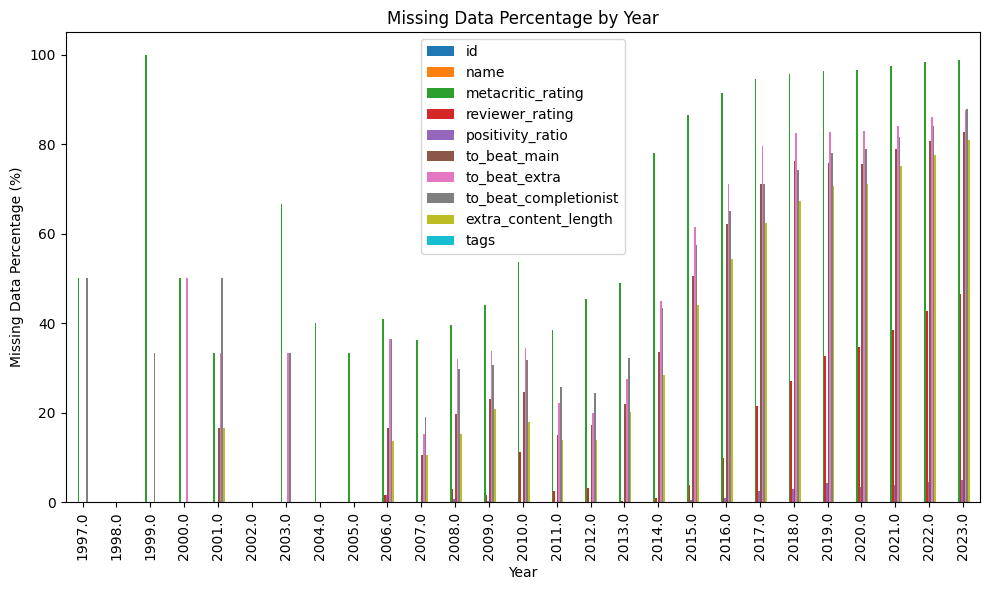

In [448]:
missing_by_year = df.groupby('year').agg(lambda x: x.isnull().mean() * 100).reset_index()
missing_by_year.plot(kind='bar', x='year', figsize=(10, 6), stacked=False)

plt.title('Missing Data Percentage by Year')
plt.xlabel('Year')
plt.ylabel('Missing Data Percentage (%)')
plt.tight_layout()
plt.show()

$\rightarrow$ Question will be based on the period 2004-2005 since they only have missing values in ```metacritic_rating``` column

- Distribution of numeric columns:

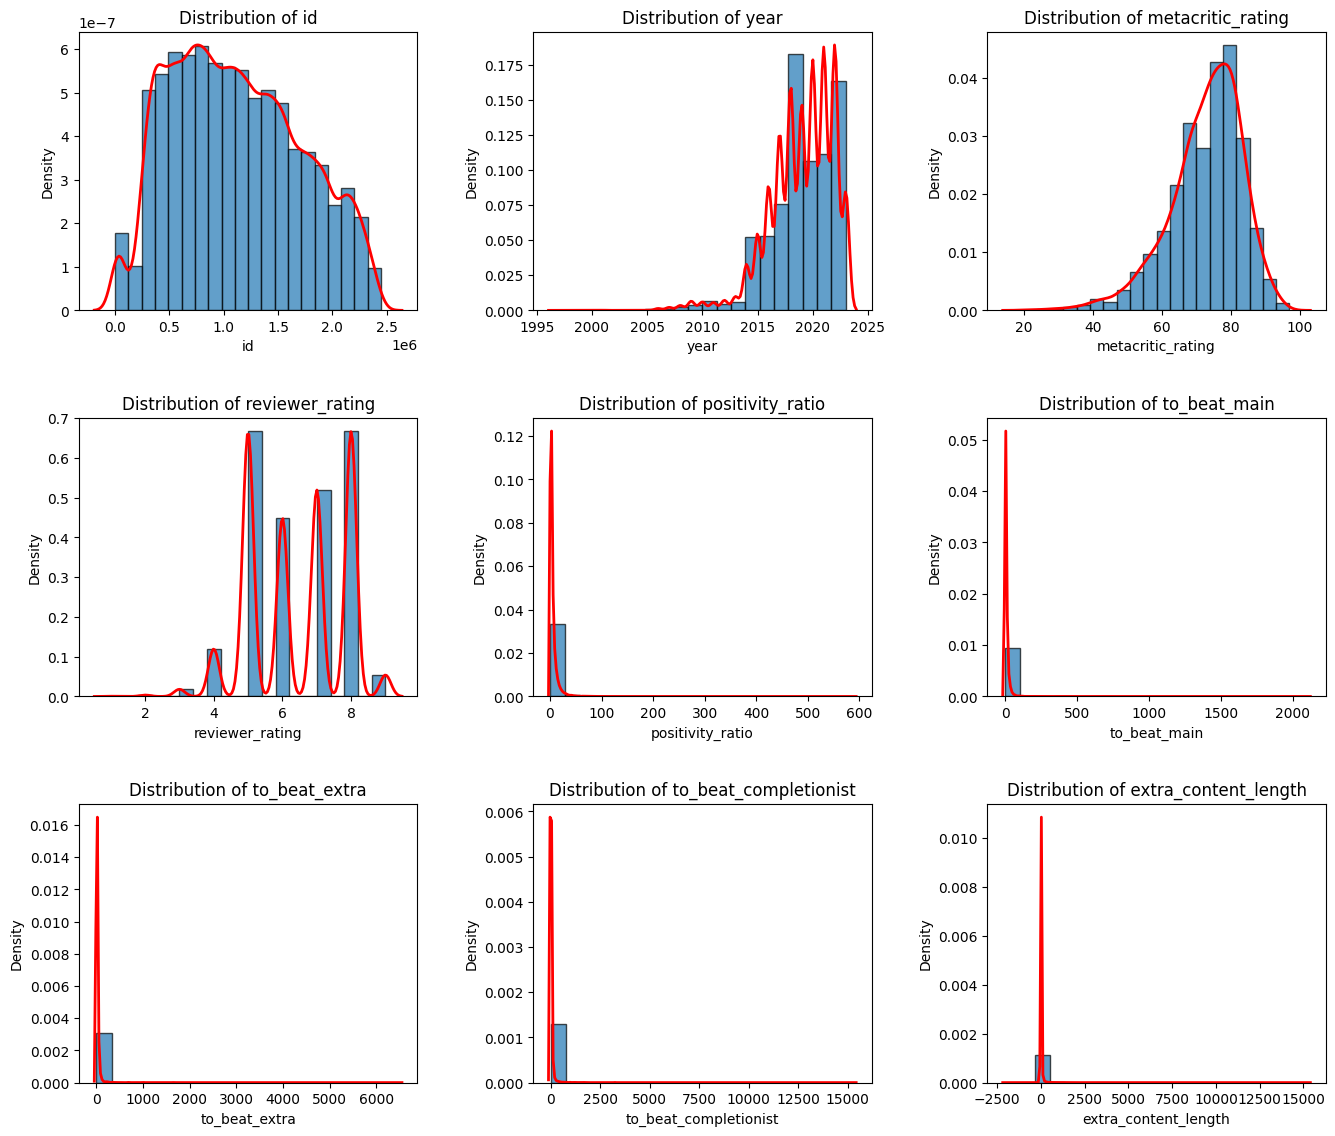

In [449]:
numeric_cols = ['id', 'year', 'metacritic_rating', 'reviewer_rating', 'positivity_ratio', 'to_beat_main', 'to_beat_extra', 'to_beat_completionist', 'extra_content_length']
plt.figure(figsize=(14, 12))  

for i in range(len(numeric_cols)):
    plt.subplot(3, 3, i + 1)  
    plt.hist(df[numeric_cols[i]], bins=20, edgecolor='black', alpha=0.7, density=True)
    sns.kdeplot(df[numeric_cols[i]], color='red', linewidth=2)
    plt.title(f'Distribution of {numeric_cols[i]}')
    plt.xlabel(numeric_cols[i])
    plt.ylabel('Density')

plt.tight_layout(pad=3.0)  
plt.show()

### With each categorical column, how are values distributed?

- What is the percentage of missing values?

In [450]:
categorical_cols = ['name', 'tags']
missing_data = {cate_col: sum(value == "?" or value != value for value in df[cate_col]) / len(df[cate_col]) * 100 for cate_col in df[categorical_cols]}
for k, v in missing_data.items():
    print(f'{k}: {v} %')

name: 0.0 %
tags: 0.0 %


$\rightarrow$ **No** missing data.

- How many different values? Show a few

In [451]:
distinct_values = df[['name', 'tags']].nunique()
print(distinct_values)

distinct_values_name = df['name'].unique()[:5]  
distinct_values_tags = df['tags'].unique()[:5]  

print("Distinct 'name' values:", distinct_values_name)
print("Distinct 'tags' values:", distinct_values_tags)


name    63186
tags    54024
dtype: int64
Distinct 'name' values: ['The Tiny Bang Story' 'World of Guns: Gun Disassembly'
 'Microsoft Flight Simulator 40th Anniversary Edition' 'Hacknet'
 'SpaceChem']
Distinct 'tags' values: ['Story Rich|Steampunk|Adventure|Atmospheric|Puzzle|Surreal|Collectathon|Comedy|Relaxing|Touch-Friendly|Classic|Funny|Mystery|Casual|Indie|Short|Cartoony|Retro|Logic|Cult Classic|Remake|Singleplayer|Minigames|Great Soundtrack|Hand-drawn|Colorful|Cute|Hidden Object|Family Friendly|2D|Stylized'
 'Horror|First-Person|Historical|Multiplayer|Strategy|Gun Customization|Action|Old School|Adventure|Military|Exploration|Puzzle|Free to Play|Co-op|FPS|Open World|Relaxing|Funny|3D|Casual|Indie|Shooter|America|Simulation|Singleplayer|Realistic|3D Platformer|Online Co-Op|Education|Logic|Sandbox'
 'Multiplayer|Adventure|VR|Action Roguelike|Physics|Atmospheric|Boxing|Surreal|Psychological Horror|Controller|Beautiful|Open World|Auto Battler|Flight|Sexual Content|Real-Time|Short|Life

- Are they abnormal?

$\rightarrow$ **No**.

## 3. Asking meaningful questions

### Question 1: Which games have received the highest overall player ratings over the years? (List the top 20 games)

#### Benefits of finding answer:
- For developers:
    - **Identify Top Performers**: Helps identify games that have consistently performed well, guiding developers and publishers in understanding what works in the market.
    - **Marketing Insights**: Offers valuable insights for marketing strategies, emphasizing the qualities of these games to attract audiences.
    - **Investment Opportunities**: Guides investors or stakeholders to identify game developers or studios that consistently produce top-rated games.
- For customers:
    - **Customers Guidance**: Assists players in discovering well-rated games, influencing purchase decisions and improving user satisfaction.

#### How to find the answer by using data?
- Calculate the ```overall_rating``` for each Steam game. Formula:
- Sort dataset by ```overall_rating``` column.
- List the top 20 games by ```overall_rating```.

### Question 2: What are the trends in the shifting popularity of game tags in recent years (around the past 4 years)?

#### Benefits of finding answer:
- **Trend Analysis**: Helps understand which game genres or themes are gaining or losing popularity, informing future game development decisions.
- **Content Strategy**: Guides developers in choosing game features or themes to align with current and future player expectations.
- **Community Engagement**: Facilitates better engagement with players by aligning content updates or DLCs with trending tags or genres.
- **Consumer Behavior Insights**: Offers an understanding of changing player preferences, helping refine marketing campaigns and game recommendations.

#### How to find the answer by using data?
- To address this question, we will approach it from two perspectives:
    - The overall user rating (```overall_rating```) for each game tag.
    - The number of games associated with each game tag.
- For each approach, we will focus only on the top 5 tags with the highest rating scores and the largest number of games (to observe trends).

## 4. Preprocessing and analyzing data to answer each question

### 4.1 Overall preprocessing:

- ```id``` column is no longer helpful for further data exploration so it is unnecessary and will be removed.

In [452]:
del df['id']

- From the result of the percentage of missing values based on ```years```, the ```metacritic_rating``` column has the highest percentage, and it is not necessary to be used for answering questions, so it will also be removed.

In [453]:
del df['metacritic_rating']

- Remove rows with **year** == ```Nan```:

In [454]:
df = df[df['year'].notna()]

- Sort the dataset by ```year```:

In [455]:
df = df.sort_values(by='year', ascending=True, ignore_index=True)

- Based on the distribution, the missing values will be filled by their **median**

In [456]:
df['reviewer_rating'] = df['reviewer_rating'].fillna(df['reviewer_rating'].median())
df['positivity_ratio'] = df['positivity_ratio'].fillna(df['positivity_ratio'].median())
df['to_beat_main'] = df['to_beat_main'].fillna(df['to_beat_main'].median())
df['to_beat_extra'] = df['to_beat_extra'].fillna(df['to_beat_extra'].median())
df['to_beat_completionist'] = df['to_beat_completionist'].fillna(df['to_beat_completionist'].median())
df['extra_content_length'] = df['extra_content_length'].fillna(df['extra_content_length'].median())

- Convert ```year``` column to ```datetime``` type:

In [457]:
df = df.copy()
df['year_temp'] = df['year']
df.drop(columns=['year'], inplace=True)
df['year'] = df['year_temp'].apply(lambda x: datetime.datetime(int(x), 1, 1).year)
df.drop(columns=['year_temp'], inplace=True)

- Convert ```reviewer_rating``` column into ```int``` type

In [458]:
df['reviewer_rating'] = df['reviewer_rating'].apply(lambda x: int(x) if pd.notna(x) else x)

- Dataset after **preprocessing**:

In [459]:
df

,name,reviewer_rating,positivity_ratio,to_beat_main,to_beat_extra,to_beat_completionist,extra_content_length,tags,year
0,POSTAL,8,7.791457,2.54,3.38,9.73,7.19,Horror|Multiplayer|Level Editor|Action|Atmosph...,1997
1,Carmageddon Max Pack,8,7.906977,19.28,26.00,7.76,-19.28,Combat Racing|Classic|Racing|Arcade|Multiplaye...,1997
2,Half-Life,9,27.847231,17.17,17.41,18.40,1.23,Story Rich|First-Person|Action-Adventure|Multi...,1998
3,Half-Life: Opposing Force,9,19.693287,12.08,14.00,15.37,3.29,First-Person|Story Rich|Action|Adventure|Milit...,1999
4,Legacy of Kain: Soul Reaver,6,2.795309,11.79,12.78,14.51,2.72,Horror|Story Rich|Action-Adventure|Action|Adve...,1999
...,...,...,...,...,...,...,...,...,...
63438,Mr. Hopp's Playhouse 3,8,11.000000,2.04,7.50,7.76,-2.04,Horror|Story Rich|Action-Adventure|3D|Indie|Pi...,2023
63439,Shame Legacy,5,1.439024,2.38,7.50,3.38,1.00,Horror|Violent|Dark|Mystery Dungeon|First-Pers...,2023
63440,Melon Journey: Bittersweet Memories,8,6.875000,5.50,6.28,6.50,1.00,Cute|Pixel Graphics|Casual|Adventure,2023
63441,Forest Of Relics,8,8.000000,4.00,7.50,7.76,1.72,Platformer|3D Platformer|Funny|3D|Sexual Conte...,2023


### 4.2. Preprocessing and answering Question 1: 

- Drop unnecessary columns

In [460]:
df_q1 = df.drop(columns=['reviewer_rating', 'positivity_ratio', 'tags', 'to_beat_extra']) 

- Filter data into 2004-2005 period

In [461]:
df_q1 = df_q1[(df_q1['year'] == 2004) | (df_q1['year'] == 2005)]

In [462]:
df_q1

,name,to_beat_main,to_beat_completionist,extra_content_length,year
18,Counter-Strike: Source,28.61,563.75,535.14,2004
19,Half-Life 2,17.17,18.40,1.23,2004
20,Counter-Strike: Condition Zero,28.61,563.75,535.14,2004
21,Half-Life 2: Deathmatch,12.95,19.47,6.52,2004
22,Half-Life: Source,12.08,15.37,3.29,2004
23,Geneforge 3,13.24,75.00,61.76,2005
24,Rag Doll Kung Fu,1.83,5.00,3.17,2005
25,Dungeon Siege II,27.09,53.77,26.68,2005
26,Half-Life 2: Lost Coast,12.95,19.47,6.52,2005
27,Darwinia,10.08,22.78,12.70,2005


### 4.3. Preprocessing and answering Question 2: 

- Drop unnecessary columns

In [463]:
df_q2 = df.drop(columns=['to_beat_main', 'to_beat_extra', 'to_beat_completionist', 'extra_content_length'])
df_q2

,name,reviewer_rating,positivity_ratio,tags,year
0,POSTAL,8,7.791457,Horror|Multiplayer|Level Editor|Action|Atmosph...,1997
1,Carmageddon Max Pack,8,7.906977,Combat Racing|Classic|Racing|Arcade|Multiplaye...,1997
2,Half-Life,9,27.847231,Story Rich|First-Person|Action-Adventure|Multi...,1998
3,Half-Life: Opposing Force,9,19.693287,First-Person|Story Rich|Action|Adventure|Milit...,1999
4,Legacy of Kain: Soul Reaver,6,2.795309,Horror|Story Rich|Action-Adventure|Action|Adve...,1999
...,...,...,...,...,...
63438,Mr. Hopp's Playhouse 3,8,11.000000,Horror|Story Rich|Action-Adventure|3D|Indie|Pi...,2023
63439,Shame Legacy,5,1.439024,Horror|Violent|Dark|Mystery Dungeon|First-Pers...,2023
63440,Melon Journey: Bittersweet Memories,8,6.875000,Cute|Pixel Graphics|Casual|Adventure,2023
63441,Forest Of Relics,8,8.000000,Platformer|3D Platformer|Funny|3D|Sexual Conte...,2023


- Add ```Singleplayer / Multiplayer``` column, extracted from ```tags``` and drop the ```tags``` column

In [464]:
def play_mode(tags):
    if "Singleplayer" in tags and "Multiplayer" in tags:
        return "Both"
    elif "Singleplayer" in tags:
        return "Singleplayer"
    elif "Multiplayer" in tags:
        return "Multiplayer"
    else:
        return "None"

df_q2['Singleplayer / Multiplayer'] = [play_mode(tag) for tag in df_q2['tags']]
df_q2.drop(columns='tags')

,name,reviewer_rating,positivity_ratio,year,Singleplayer / Multiplayer
0,POSTAL,8,7.791457,1997,Both
1,Carmageddon Max Pack,8,7.906977,1997,Both
2,Half-Life,9,27.847231,1998,Both
3,Half-Life: Opposing Force,9,19.693287,1999,Singleplayer
4,Legacy of Kain: Soul Reaver,6,2.795309,1999,Singleplayer
...,...,...,...,...,...
63438,Mr. Hopp's Playhouse 3,8,11.000000,2023,Singleplayer
63439,Shame Legacy,5,1.439024,2023,Singleplayer
63440,Melon Journey: Bittersweet Memories,8,6.875000,2023,None
63441,Forest Of Relics,8,8.000000,2023,Singleplayer


# 5. Reflection